## Домашнее задание 2

Дедлайн — ***6.09.18 12:00***. 

Выполненные задания можно присылать на почту zueva.nn@phystech.edu либо загружать в папку в своем репозитории.

В этом задании предлагается продолжить то, что мы начали делать на семинаре — принять участие в соревновании на платформе 'Kaggle'!

Мы будем работать с  уже знакомым нам соревнованием **House Prices: Advanced Regression Techniques**: 

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

Задачей является предсказание цены дома по большому набору фич. Вам необходимо обучиться на `train.csv` и отправить свои предсказания для данных, которые лежат в `test.csv`. Все данные находятся в папке **Seminars/Seminar2**. Там же можно найти `baseline solutions` — базовые и простые решения без особых надстроек.


### Часть 1

1. Если вы еще не зарегистрированы на платформе `Kaggle`, то это можно сделать здесь: www.kaggle.com.
   Регистрация нужна для того, чтобы Ваши посылки были привязаны к конкретному аккаунту. 
2. После регистрации на ресурсе нужно стать участником соревнования: https://www.kaggle.com/c/house-prices-advanced-regression-techniques
3. После того, как вы зарегистрировались на участие в конкретном соревновании, вы готовы работать с данными. Обычно их можно скачать в разделе `Data`, но данные оттуда уже лежат в папке **Seminars/Seminar2**.
#### Сделано. Логин Botanok

### Часть 2

Как только вы зарегистрировались и скачали данные, можно приступать к работе с ними.
1. Загрузите данные с помощью функций из пакета `Pandas` read_csv(). Обратите внимание на параметры — если у данных в первой строке стоят названия столбцов, то параметр **Header** нужно сделать истинным. Если данные вводятся через запятую, то параметру **sep** (separator) нужно передать символ `,`. Подробнее про параметры read_csv можно почитать здесь: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html. Как видите, их очень много и чтение файла можно настроить очень тонко

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

pd.options.display.max_rows = 200 # для возмжности вывода всех параметров на экран
%matplotlib inline
warnings.filterwarnings('ignore')

In [61]:
train = pd.read_csv(r'../../Seminars/Seminar_2/train_housing.csv')

test = pd.read_csv(r'../../Seminars/Seminar_2/test_housing.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [63]:
# Числовые признаки
train_numeric = train.select_dtypes(include=['float64', 'int64'])

# Категориальные признаки
train_categoric = train.select_dtypes(exclude=['float64', 'int64'])

In [5]:
train['PoolArea'].value_counts()
# Имеет смысл заменить на признак "наличие бассейна"

0      1453
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64

In [6]:
train['ScreenPorch'].value_counts()
# Имеет смысл заменить на признак "наличие крыльца"

0      1344
192       6
224       5
120       5
189       4
180       4
160       3
168       3
144       3
126       3
147       3
90        3
200       2
198       2
216       2
184       2
259       2
100       2
176       2
170       2
288       2
142       2
153       1
154       1
152       1
155       1
145       1
156       1
143       1
322       1
140       1
161       1
128       1
122       1
410       1
119       1
116       1
99        1
95        1
80        1
63        1
60        1
53        1
40        1
130       1
175       1
163       1
165       1
291       1
287       1
276       1
273       1
271       1
266       1
265       1
263       1
260       1
252       1
234       1
233       1
225       1
374       1
222       1
220       1
210       1
204       1
197       1
385       1
190       1
396       1
185       1
182       1
440       1
178       1
312       1
480       1
Name: ScreenPorch, dtype: int64

In [7]:
train['EnclosedPorch'].value_counts()
# Имеет смысл заменить на признак "наличие закрытого крыльца"

0      1252
112      15
96        6
120       5
144       5
192       5
216       5
252       4
116       4
156       4
126       3
228       3
128       3
184       3
102       3
150       3
40        3
176       3
164       3
77        2
185       2
80        2
180       2
84        2
160       2
168       2
205       2
158       2
154       2
100       2
108       2
137       2
114       2
115       2
202       2
190       2
234       2
244       2
36        2
240       2
34        2
39        2
224       2
32        2
264       2
236       2
30        1
105       1
94        1
24        1
99        1
98        1
318       1
20        1
301       1
330       1
19        1
56        1
54        1
37        1
60        1
64        1
67        1
68        1
70        1
294       1
52        1
50        1
48        1
44        1
42        1
81        1
87        1
90        1
91        1
275       1
293       1
123       1
221       1
200       1
208       1
210       1
212       1
214 

In [8]:
train['3SsnPorch'].value_counts()
# Имеет смысл заменить на признак "наличие 3-сезонного крыльца"

0      1436
168       3
216       2
144       2
180       2
245       1
238       1
290       1
196       1
182       1
407       1
304       1
162       1
153       1
320       1
140       1
130       1
96        1
23        1
508       1
Name: 3SsnPorch, dtype: int64

In [9]:
train_categoric.head(5).T

,0,1,2,3,4
MSZoning,RL,RL,RL,RL,RL
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub
LotConfig,Inside,FR2,Inside,Corner,FR2
LandSlope,Gtl,Gtl,Gtl,Gtl,Gtl
Neighborhood,CollgCr,Veenker,CollgCr,Crawfor,NoRidge
Condition1,Norm,Feedr,Norm,Norm,Norm


In [10]:
train_numeric.head(5).T

,0,1,2,3,4
Id,0.693147,1.098612,1.386294,1.609438,1.791759
MSSubClass,4.110874,3.044522,4.110874,4.262680,4.110874
LotFrontage,4.189655,4.394449,4.234107,4.110874,4.442651
LotArea,9.042040,9.169623,9.328212,9.164401,9.565284
OverallQual,2.079442,1.945910,2.079442,2.079442,2.197225
OverallCond,1.791759,2.197225,1.791759,1.791759,1.791759
YearBuilt,7.602900,7.589336,7.601902,7.557995,7.601402
YearRemodAdd,7.602900,7.589336,7.602401,7.586296,7.601402
MasVnrArea,5.283204,0.000000,5.093750,0.000000,5.860786
BsmtFinSF1,6.561031,6.886532,6.188264,5.379897,6.486161


In [11]:
# Этот признак хоть и формально числовой, но на самом деле категориальный
train['MSSubClass'].value_counts(normalize=True)

20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: MSSubClass, dtype: float64

С какими типами признаков вы столкнулись?


Ответ: Числовые и категориальные

### Часть 3
Какие признаки выглядят бесполезными? Попробуйте выбросить некоторые фичи, опираясь на ваш личный жизненный опыт или алгоритмы `feature selection`. Подробнее про них можно прочитать здесь: http://scikit-learn.org/stable/modules/feature_selection.html
#### Отобрал все числовые фичи, из категориальных оставил те, которые имеют бизнес смысл

Какие фичи кажутся вам самыми значимыми? Оцените значимость признаков, опираясь на описанный выше алгоритм, либо на ваш личный опыт, постройте для трех самых значимых графики. Как распределены данные? По какому закону?

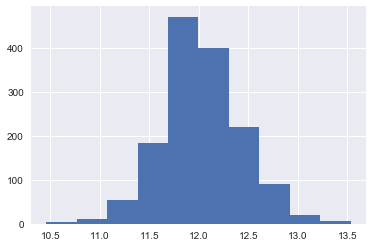

In [29]:
# логарифмируем распределение целевой переменной, чтобы распределение было похоже на нормальное
np.log1p(train['SalePrice']).hist()

In [64]:
# Заменяем целевую переменную на ее логарифм
train['SalePrice'] = np.log1p(train['SalePrice'])

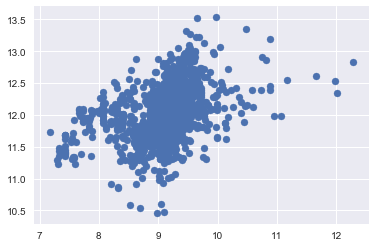

In [67]:
# Тут зависимость от логарифма
plt.scatter(np.log1p(train['LotArea']), train['SalePrice'])

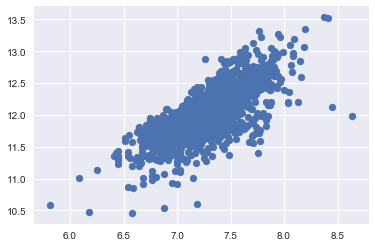

In [35]:
# Тут зависимость от логарифма
plt.scatter(np.log1p(train['GrLivArea']), train['SalePrice'])

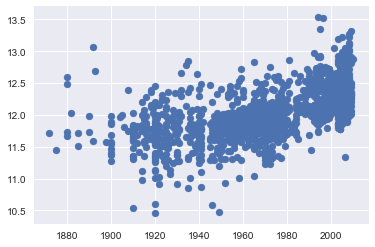

In [41]:
plt.scatter(train['YearBuilt'], train['SalePrice'])

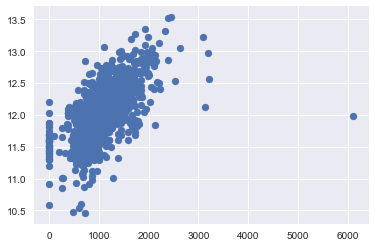

In [44]:
plt.scatter(train['TotalBsmtSF'], train['SalePrice'])

In [68]:
# Убираем очевидно лишние признаки, добавляем категориальные, которые по бизнес-смыслу должны влять на цену
# признаки типа "Площадь бассейна" заменяем на "Наличие бассейна"
# пару признаков заменяем их логарифмами

X_train = pd.concat([train_numeric.drop(['SalePrice', 'Id', 'MSSubClass', 'GarageYrBlt',
                                         'PoolArea', '3SsnPorch', 'ScreenPorch', 'EnclosedPorch',
                                        'LotArea', 'GrLivArea'], axis=1),
                     train_numeric['PoolArea'].apply(lambda x: np.minimum(x, 1)),
                     train_numeric['ScreenPorch'].apply(lambda x: np.minimum(x, 1)),
                     train_numeric['3SsnPorch'].apply(lambda x: np.minimum(x, 1)),
                     train_numeric['EnclosedPorch'].apply(lambda x: np.minimum(x, 1)),
                     np.log1p(train_numeric['LotArea']),
                     np.log1p(train_numeric['GrLivArea']),
                      train['Fence'].apply(lambda x: 0 if pd.isnull(x) else 1),
                     pd.get_dummies(train_categoric['BldgType'], prefix = 'BldgType'),
                     pd.get_dummies(train_categoric['HouseStyle'], prefix = 'HouseStyle'),
                     pd.get_dummies(train_categoric['Foundation'], prefix = 'Foundation'),
                     pd.get_dummies(train_categoric['Functional'], prefix = 'Functional'),
                     pd.get_dummies(train['MSSubClass'], prefix = 'MSSubClass'),
                     pd.get_dummies(train_categoric['Condition1'], prefix = 'Condition1'),
                     pd.get_dummies(train_categoric['SaleCondition'], prefix = 'SaleCondition'),
                     pd.get_dummies(train_categoric['LotConfig'], prefix = 'LotConfig')
                    ], axis=1).fillna(0)
Y_train = train['SalePrice']

Попробуйте запустить обучение на разных алгоритмах (пример запуска в семинарах):
1. Линейная регрессия http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
2. Решающее дерево http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
3. Случайный лес http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
4. Градиентный бустинг http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

И любые другие модели, которые покажутся вам интересными :)

P.S.не забудьте использовать **cross_validation** и **K-Fold!**
Также можно распараллелить процесс обучения, если параметру *n_jobs* в регрессор передать значение *-1*.
С помощью  *cross_val_score* можно оценивать качество построенной модели.
Также у каждого регрессора есть множество *параметров*. Подробно про них можно прочитать в документации http://scikit-learn.org

Пример запуска модели можно найти в **Seminars/Seminar2**.

In [47]:
# Библиотекаи для моделирования

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

In [69]:
# Просто регрессия.
lr = LinearRegression()
cross_val_score(lr, X_train, Y_train, scoring='neg_mean_squared_error')

array([-0.01711099, -0.0217588 , -0.02177847])

In [71]:
# Лассо. Хуже регрессии
lasso = Lasso(random_state=37)
cross_val_score(lasso, X_train, Y_train, scoring='neg_mean_squared_error') 

array([-0.03049094, -0.03975683, -0.05221142])

In [54]:
# Подбираем параметры случайного леса
rf = RandomForestRegressor(random_state=32)
params = {'n_estimators': [50, 100, 200, 500]}

gsv = GridSearchCV(estimator=rf, param_grid=params, scoring='neg_mean_squared_error', cv=3, verbose=1)
gsv.fit(X_train, Y_train)


Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   45.9s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=32,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [50, 100, 200, 500]},
       pre_dispatch='2*n_jobs', refit=True,
       scoring='neg_mean_squared_error', verbose=1)

In [55]:
print(gsv.best_params_, gsv.best_score_)

{'n_estimators': 200} -0.02215807645442593


In [73]:
# Случайный лес. Хуже регрессии
rf = RandomForestRegressor(random_state=32, n_estimators=200)
cross_val_score(rf, X_train, Y_train, scoring='neg_mean_squared_error') 

array([-0.02130157, -0.02445331, -0.02027507])

In [57]:
# Подбираем параметры бустинга
xg = GradientBoostingRegressor(verbose=0, random_state=32)
params = {'n_estimators': [50, 100, 200, 300, 500], 'max_depth': [3, 5, 8, 10]}

gsv = GridSearchCV(estimator=xg, param_grid=params, scoring='neg_mean_squared_error', cv=3, verbose=1)
gsv.fit(X_train, Y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  2.0min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=32, subsample=1.0, verbose=0,
             warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [50, 100, 200, 300, 500], 'max_depth': [3, 5, 8, 10]},
       pre_dispatch='2*n_jobs', refit=True,
       scoring='neg_mean_squared_error', verbose=1)

In [58]:
print(gsv.best_params_, gsv.best_score_)

{'max_depth': 3, 'n_estimators': 200} -0.0178645394237347


In [74]:
# Бустинг. Лучше регрессии
xg = GradientBoostingRegressor(max_depth=3, n_estimators=200, random_state=32)
cross_val_score(xg, X_train, Y_train, scoring='neg_mean_squared_error') 

array([-0.01528479, -0.02246163, -0.01583653])

### Готовим тестовый датасет

In [76]:
# Числовые признаки
test_numeric = test.select_dtypes(include=['float64', 'int64'])

# Категориальные признаки
test_categoric = test.select_dtypes(exclude=['float64', 'int64'])

In [77]:
X_test = pd.concat([test_numeric.drop(['Id', 'MSSubClass', 'GarageYrBlt',
                                       'PoolArea', '3SsnPorch', 'ScreenPorch', 'EnclosedPorch',
                                      'LotArea', 'GrLivArea'], axis=1),
                     test_numeric['PoolArea'].apply(lambda x: np.minimum(x, 1)),
                     test_numeric['ScreenPorch'].apply(lambda x: np.minimum(x, 1)),
                     test_numeric['3SsnPorch'].apply(lambda x: np.minimum(x, 1)),
                     test_numeric['EnclosedPorch'].apply(lambda x: np.minimum(x, 1)),
                     np.log1p(test_numeric['LotArea']),
                     np.log1p(test_numeric['GrLivArea']),
                     test['Fence'].apply(lambda x: 0 if pd.isnull(x) else 1),
                     pd.get_dummies(test_categoric['BldgType'], prefix = 'BldgType'),
                     pd.get_dummies(test_categoric['HouseStyle'], prefix = 'HouseStyle'),
                     pd.get_dummies(test_categoric['Foundation'], prefix = 'Foundation'),
                     pd.get_dummies(test_categoric['Functional'], prefix = 'Functional'),
                     pd.get_dummies(test['MSSubClass'], prefix = 'MSSubClass'),
                     pd.get_dummies(test_categoric['Condition1'], prefix = 'Condition1'),
                     pd.get_dummies(test_categoric['SaleCondition'], prefix = 'SaleCondition'),
                     pd.get_dummies(test_categoric['LotConfig'], prefix = 'LotConfig')
                    ], axis=1).fillna(0)

In [78]:
#функция для формирования файла для отправки в соревнование
def submit(preds):
    submission = pd.read_csv("sample_submission.csv")
    submission["SalePrice"] = preds
    submission.to_csv("submission.csv", index=False)

In [81]:
xg = GradientBoostingRegressor(max_depth=3, n_estimators=200, random_state=32)
xg.fit(X_train, Y_train)
preds = xg.predict(X_test)

In [89]:
rf = RandomForestRegressor(random_state=32, n_estimators=200)
rf.fit(X_train, Y_train)
preds = rf.predict(X_test)

In [87]:
lr = LinearRegression()
lr.fit(X_train, Y_train)
preds = lr.predict(X_test)

In [90]:
submit(np.expm1(preds))

### Часть 4
После того, как вы сформировали файл `submission.csv`, он появится в той же директории, где находится основной Jupyter Notebook. Далее его необходимо отправить в систему. Для этого нужно нажать на `Submit Predictions`.
Далее вы нажиматее `Upload Submission File` и отправляете туда `submission.csv` (сам код отправлять в этом соревновании не нужно!). После того, как Вы нажали `Submit`, Kaggle перенаправит вас на *Leader board*, где вы сможете увидеть свой *score* и место среди всех участников.
Будьте внимательны, нельзя делать больше 10 посылок в день!

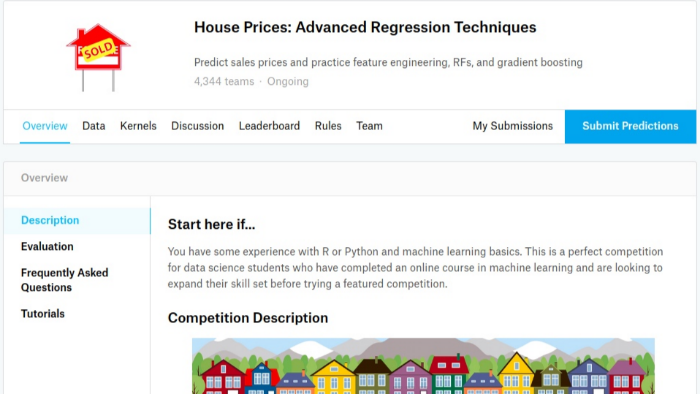

In [16]:
from IPython.display import Image
Image("1.png")

Идеи, как можно улучшить результат:
* Найти какие категориальные признаки являются ординальными и закодировать их соответственно
* Найти наиболее важные категориальные признаки и попробовать их закодировать разными способами
* Потюнить регрессор
* Сгенерировать новые признаки

### Часть 4
Опишите полученные результаты, какого скора Вы смогли добиться, какое место заняли? Какой алгоритм оказался лучше других? Можете ли Вы объяснить, почему так вышло?

Ответ:

Чем меньше ошибка на кросс-валидации, тем хуже скор на Kaggle. Максимум, чего смог добиться - 2500 место на самом корявом решении